In [1]:
import numpy as np
import matplotlib.pyplot as plt


# Sheet 1
## Exercise 27
### a)


Neglecting correlation: gaussian error propagation

$\sigma_y = \left(\left(\frac{\partial y}{\partial x_1}\sigma_{x_1}\right)^2+\left(\frac{\partial y}{\partial x_2}\sigma_{x_2}\right)^2\right)^\frac{1}{2}$


$ y = a_0 + a_1 x$

$\sigma_y = \left(\left(1 \sigma_{a_0}\right)^2 + \left(x\sigma_{a_1}\right)^2\right)^\frac{1}{2}$

$\sigma_y = \left(\left(0,2\right)^2 + \left(0,2 x\right)^2\right)^\frac{1}{2}$

$\sigma_y = 0,2\left(1+x^2\right)^\frac{1}{2}$

Not neglecting correlation:

$\text{Cov}(a_0,a_1) = \rho \sigma_{a_0} \sigma_{a_1} = -0,8 \cdot 0,2 \cdot 0,2 = -0,032 $

$ \sigma_y = \left(\sum_{i=1}^{m}\left(\frac{\partial y}{\partial x_i}\sigma_{x_i}\right)^2 + 
2\sum_{i=1}^{m-1}\sum_{k=i+1}^{m}\left(\frac{\partial y}{\partial x_i}\right)\left(\frac{\partial y}{\partial x_k}\right)\text{Cov}(x_i,x_k)\right)^\frac{1}{2}$

$\sigma_y = \left(\left(1 \sigma_{a_0}\right)^2 + \left(x\sigma_{a_1}\right)^2 + 2\left(\frac{\partial y}{\partial a_0}\right)\left(\frac{\partial y}{\partial a_1}\right) \text{Cov}(x_i,x_k) \right)^\frac{1}{2}$

$\sigma_y = \left(\left(0,2\right)^2 + \left(0,2 x\right)^2 + 2 \cdot 1 \cdot x(-0,8)(0,2)^2\right)^\frac{1}{2}$

$\sigma_y = 0,2\left(1 + x^2 -1,6x\right)^\frac{1}{2}$

### b)

In [2]:
n = 10**5

rng = np.random.default_rng(420)

means = [1, 1]
cov = [0.04, -0.032],[-0.032, 0.04]


def y_func(x,a_0,a_1):
    return a_0 + a_1*x

def y_err(x, means=means, cov=cov, n=n):
    a_0, a_1 = rng.multivariate_normal(means, cov, n).T
    y_temp = y_func(x, a_0, a_1)
    return np.mean(y_temp), np.std(y_temp)                         


Text(0, 0.5, 'a_1')

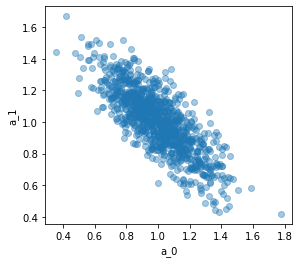

In [3]:
n = 10**3

a_0, a_1 = rng.multivariate_normal(means, cov, n).T


fig = plt.figure()

ax = fig.add_subplot(1,1,1)
ax.scatter(a_0,a_1,alpha=0.4)
ax.set_aspect('equal')
ax.set_xlabel('a_0')
ax.set_ylabel('a_1')

### c)

In [4]:
a_0, a_1 = 1,1

def y_anal(x):
    return y_func(x, a_0, a_1), 0.2*np.sqrt(1+x**2 -1.6*x) 

def printing(x):
    print('x = ', x)
    print('Analytical:\t y = ', y_anal(x)[0], '+-', y_anal(x)[1])
    y_err_temp = y_err(x)
    print('Numerically: \t y = ', y_err_temp[0], '+-', y_err_temp[1])
    print('\n')

printing(-3)
printing(0)
printing(3)


x =  -3
Analytical:	 y =  -2 +- 0.7694153624668538
Numerically: 	 y =  -1.9958925198201203 +- 0.7683599737134761


x =  0
Analytical:	 y =  1 +- 0.2
Numerically: 	 y =  1.0002906873692734 +- 0.2002475041928958


x =  3
Analytical:	 y =  4 +- 0.45607017003965516
Numerically: 	 y =  3.9989374820344175 +- 0.4573611784187006




The mean values are quite similar but the standard deviations deviate for x = +-3.